In [5]:
#import libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch 
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests


# Get Data

In [8]:
#load in all match events 

In [9]:
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3775633.json')
events = events.json()
events

[{'id': 'b7f68694-0261-4929-ad96-907e62ec630c',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 2647, 'name': 'Aston Villa'},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 2647, 'name': 'Aston Villa'},
  'duration': 0.0,
  'tactics': {'formation': 352,
   'lineup': [{'player': {'id': 38317, 'name': 'Lisa Weiß'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 29},
    {'player': {'id': 46534, 'name': "Elisha N''Dow"},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 5},
    {'player': {'id': 4657, 'name': 'Anita Amma Ankyewah Asante'},
     'position': {'id': 4, 'name': 'Center Back'},
     'jersey_number': 6},
    {'player': {'id': 46535, 'name': 'Natalie Haigh'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 15},
    {'player': {'id': 46541, 'n

# Transform data to dataframe

In [10]:
df = json_normalize(events)

In [11]:
pd.set_option("display.max.columns",None)
df.head()

id  index  period     timestamp  minute  \
0  b7f68694-0261-4929-ad96-907e62ec630c      1       1  00:00:00.000       0   
1  3474ba9d-a583-4d35-87dc-d06060a70e1c      2       1  00:00:00.000       0   
2  82665823-49b6-413e-a8bf-68fcc45eab52      3       1  00:00:00.000       0   
3  dc452a79-0089-4e2e-82b6-d8349fd5718f      4       1  00:00:00.000       0   
4  5d4b6853-20d6-45f7-a931-0e4ab3e74306      5       1  00:00:00.341       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                2647   
1       0           1  0.000000       35  Starting XI                2647   
2       0           1  0.000000       18   Half Start                2647   
3       0           1  0.000000       18   Half Start                2647   
4       0           2  2.518957       30         Pass                2647   

  possession_team.name  play_pattern.id play_pattern.name  team.id  \
0          Aston Villa                1      Regular Play     2647   
1          Aston Villa                1      Regular Play      749   
2          Aston Villa                1      Regular Play      749   
3          Aston Villa                1      Regular Play     2647   
4          Aston Villa                9     From Kick Off     2647   

                 team.name  tactics.formation  \
0              Aston Villa              352.0   
1  Tottenham Hotspur Women             4231.0   
2  Tottenham Hotspur Women                NaN   
3              Aston Villa                NaN   
4              Aston Villa                NaN   

                                      tactics.lineup  \
0  [{'player': {'id': 38317, 'name': 'Lisa Weiß'}...   
1  [{'player': {'id': 36800, 'name': 'Aurora Watt...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [dc452a79-0089-4e2e-82b6-d8349fd5718f]           NaN        NaN   
3  [82665823-49b6-413e-a8bf-68fcc45eab52]           NaN        NaN   
4  [03fb4483-5b79-4680-9d43-1bd04fad0e4c]  [60.0, 40.0]    46539.0   

      player.name  position.id         position.name  pass.recipient.id  \
0             NaN          NaN                   NaN                NaN   
1             NaN          NaN                   NaN                NaN   
2             NaN          NaN                   NaN                NaN   
3             NaN          NaN                   NaN                NaN   
4  Nadine Hanssen         15.0  Left Center Midfield            46534.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4       Elisha N''Dow    40.744324    2.544741             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [26.3, 62.9]               40.0          Right Foot   

   pass.type.id pass.type.name under_pressure carry.end_location  \
0           NaN            NaN            NaN                NaN   
1           NaN            NaN            NaN                NaN   
2           NaN            NaN            NaN                NaN   
3           NaN         

# Filter out necessary data

In [12]:
aston_villa_passes = df.loc[(df['type.name']=='Pass') & (df['possession_team.name']=='Aston Villa')]
aston_villa_passes.tail()

id  index  period     timestamp  \
3278  facbc916-93b1-4254-84d5-5b91dfec86f1   3279       2  00:52:50.067   
3285  3ab5acb2-dd94-4862-8dc0-831484db875f   3286       2  00:53:17.582   
3334  7b7f1c8c-3377-4bcf-8d7e-1ea32a31b955   3335       2  00:54:26.277   
3338  9cf2d595-c1e0-4755-919c-24af42c773db   3339       2  00:54:30.759   
3341  2bed290b-e9d7-4063-8aec-ea0365aaabc4   3342       2  00:54:33.123   

      minute  second  possession  duration  type.id type.name  \
3278      97      50         196  1.894564       30      Pass   
3285      98      17         198  2.649589       30      Pass   
3334      99      26         201  2.639398       30      Pass   
3338      99      30         201  2.364357       30      Pass   
3341      99      33         201  4.497327       30      Pass   

      possession_team.id possession_team.name  play_pattern.id  \
3278                2647          Aston Villa                8   
3285                2647          Aston Villa                4   
3334                2647          Aston Villa                7   
3338                2647          Aston Villa                7   
3341                2647          Aston Villa                7   

     play_pattern.name  team.id                team.name  tactics.formation  \
3278       From Keeper     2647              Aston Villa                NaN   
3285     From Throw In     2647              Aston Villa                NaN   
3334    From Goal Kick     2647              Aston Villa                NaN   
3338    From Goal Kick      749  Tottenham Hotspur Women                NaN   
3341    From Goal Kick      749  Tottenham Hotspur Women                NaN   

     tactics.lineup                                     related_events  \
3278            NaN  [48d9d896-67f6-444b-9505-662e8e06582e, 53ffdc5...   
3285            NaN  [2b0b0cab-6e58-4ab2-9b69-c86e70373fd0, 7098b8c...   
3334            NaN  [1aec5669-4c74-4360-b511-90661c63af9c, 7ee75af...   
3338            NaN             [2e04ee77-1dd3-4e90-a0f3-a4af2bdbf49e]   
3341            NaN                                                NaN   

          location  player.id               player.name  position.id  \
3278  [108.8, 8.7]    33010.0             Freya Gregory          8.0   
3285  [57.0, 80.0]    46541.0                Asmita Ale          7.0   
3334   [7.0, 36.1]    38317.0                 Lisa Weiß          1.0   
3338  [67.1, 60.8]     5078.0  Alanna Stephanie Kennedy         11.0   
3341  [82.6, 46.3]    31551.0                Kit Graham         19.0   

                  position.name  pass.recipient.id pass.recipient.name  \
3278             Left Wing Back            10102.0        Stine Larsen   
3285            Right Wing Back            10102.0        Stine Larsen   
3334                 Goalkeeper            10102.0        Stine Larsen   
3338    Left Defensive Midfield            31551.0          Kit Graham   
3341  Center Attacking Midfield                NaN                 NaN   

      pass.length  pass.angle  pass.height.id pass.height.name  \
3278    10.577334    1.302886             1.0      Ground Pass   
3285    21.612265   -0.496762             3.0        High Pass   
3334    49.826298   -0.367462             3.0        High Pass   
3338    20.086313   -0.806522             3.0        High Pass   
3341    34.505943   -1.025407             1.0      Ground Pass   

     pass.end_location  pass.body_part.id pass.body_part.name  pass.type.id  \
3278     [111.6, 18.9]               38.0           Left Foot           NaN   
3285      [76.0, 69.7]                NaN                 NaN          67.0   
3334      [53.5, 18.2]               40.0          Right Foot          63.0   
3338      [81.0, 46.3]               40.0          Right Foot          66.0   
3341     [100.5, 16.8]               40.0          Right Foot           NaN   

     pass.type.name under_pressure carry.end_location  pass.outcome.id  \
3278            NaN            NaN                NaN    

# Draw the pitch

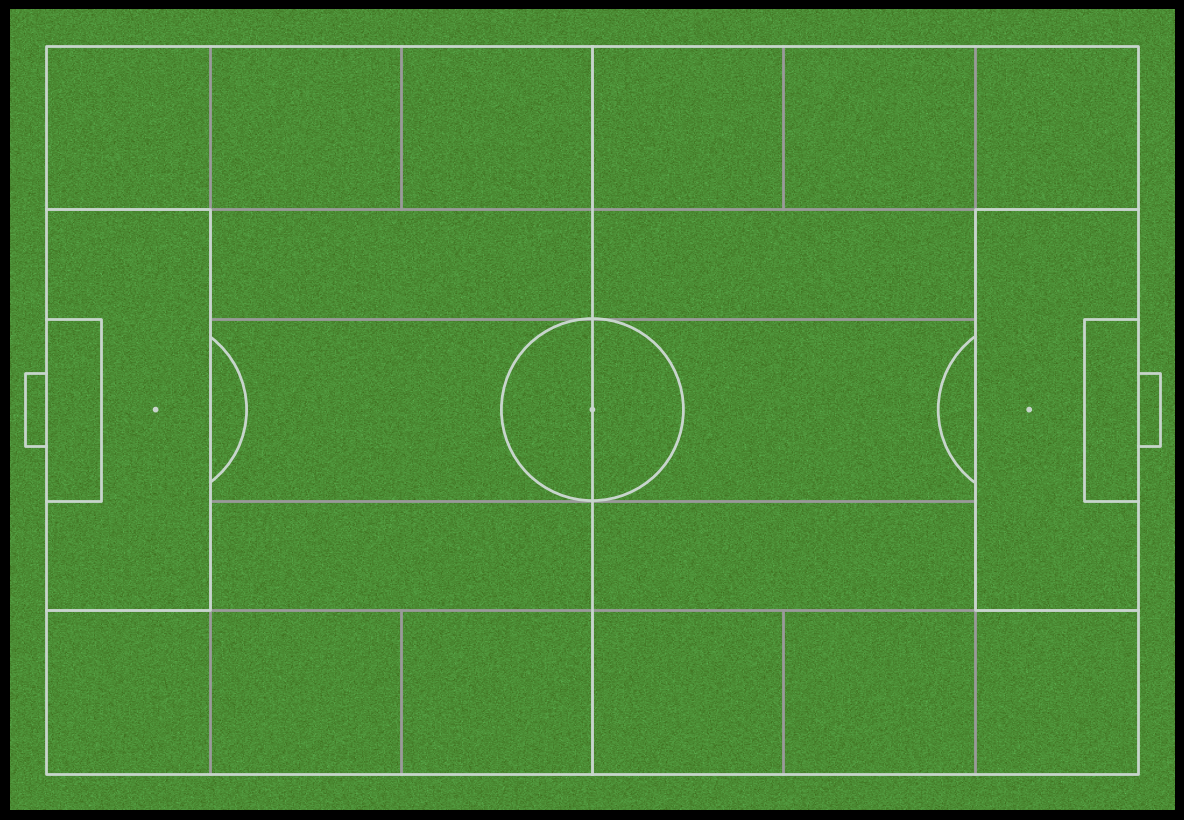

In [13]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')
pitch = Pitch(pitch_type = 'statsbomb', positional = True, positional_color = '#9A9A9A', pitch_color='grass', line_color = '#c7d5cc', goal_type='box')
pitch.draw(ax=ax)

Text(0.5, 1.0, 'Aston Villa')

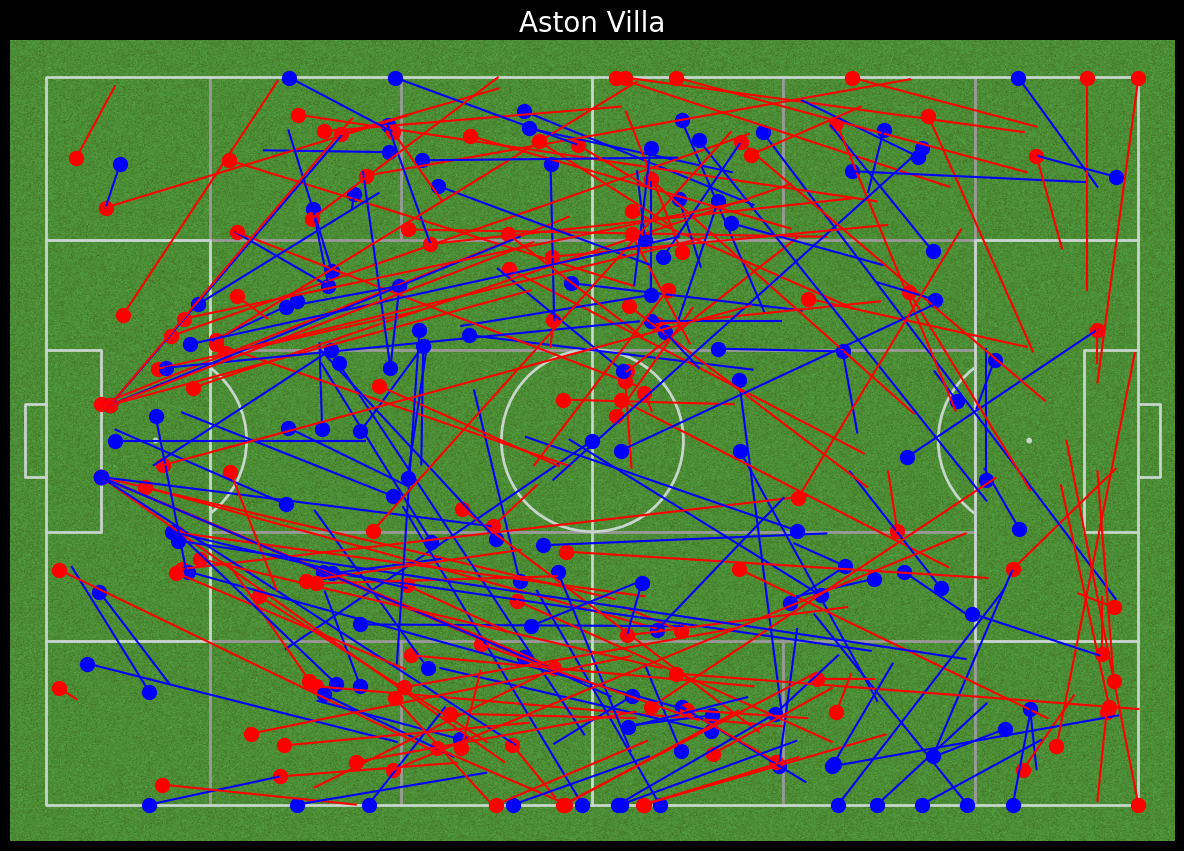

In [27]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')
pitch = Pitch(pitch_type = 'statsbomb', positional = True, positional_color = '#9A9A9A', pitch_color='grass', line_color = '#c7d5cc', goal_type='box')
pitch.draw(ax=ax)

for x in range(len(aston_villa_passes['id'])):
    if aston_villa_passes['period'].iloc[x] == 1 or aston_villa_passes['period'].iloc[x] == 2:
        if any([aston_villa_passes['pass.outcome.name'].iloc[x]=='Incomplete', aston_villa_passes['pass.outcome.name'].iloc[x]=='Out',\
                aston_villa_passes['pass.outcome.name'].iloc[x]=='Unknown', aston_villa_passes['pass.outcome.name'].iloc[x]=='Pass Offside',\
                aston_villa_passes['pass.outcome.name'].iloc[x]=='Injury Clearence']):
            
            
            plt.plot((aston_villa_passes['location'].iloc[x][0], aston_villa_passes['pass.end_location'].iloc[x][0]),\
                     (aston_villa_passes['location'].iloc[x][1], aston_villa_passes['pass.end_location'].iloc[x][1]), color = 'red')
                     
                     
            plt.scatter(aston_villa_passes['location'].iloc[x][0], aston_villa_passes['location'].iloc[x][1], color ='red',s= 100)
                     
        else:
                     
            plt.plot((aston_villa_passes['location'].iloc[x][0], aston_villa_passes['pass.end_location'].iloc[x][0]),\
            (aston_villa_passes['location'].iloc[x][1], aston_villa_passes['pass.end_location'].iloc[x][1]), color = 'blue')
                     
                     
            plt.scatter(aston_villa_passes['location'].iloc[x][0], aston_villa_passes['location'].iloc[x][1], color = 'blue', s= 100)
plt.title('Aston Villa', color = 'white', size = 20)
                 

# Applying a filter with a player

Text(0.5, 1.0, 'Diana Micaela Abreu de Sousa e Silva')

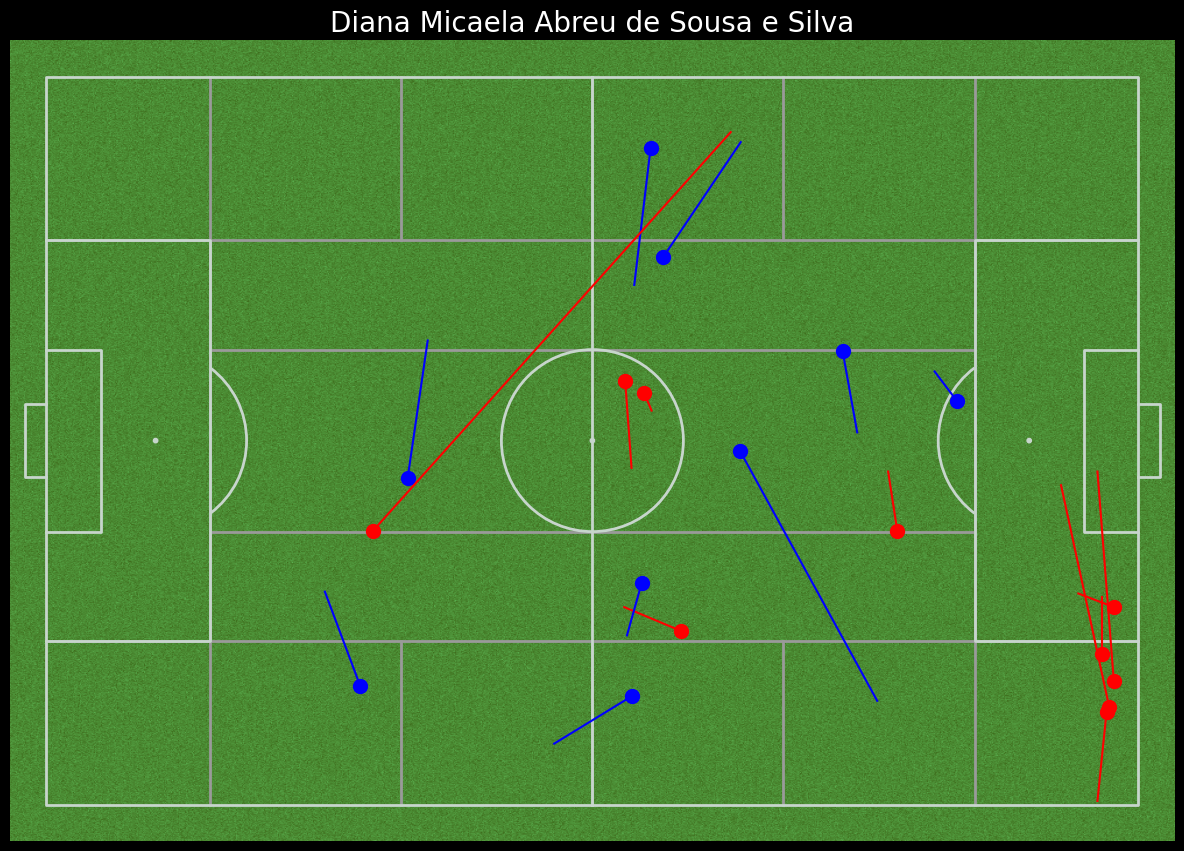

In [30]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')
pitch = Pitch(pitch_type = 'statsbomb', positional = True, positional_color = '#9A9A9A', pitch_color='grass', line_color = '#c7d5cc', goal_type='box')
pitch.draw(ax=ax)

for x in range(len(aston_villa_passes['id'])):
    if(aston_villa_passes['period'].iloc[x] == 2 or aston_villa_passes['period'].iloc[x]==1) and \
      (aston_villa_passes['player.id'].iloc[x]==10159):
        if any([aston_villa_passes['pass.outcome.name'].iloc[x]=='Incomplete', aston_villa_passes['pass.outcome.name'].iloc[x]=='Out',\
                aston_villa_passes['pass.outcome.name'].iloc[x]=='Unknown', aston_villa_passes['pass.outcome.name'].iloc[x]=='Pass Offside',\
                aston_villa_passes['pass.outcome.name'].iloc[x]=='Injury Clearence']):
            
            
            plt.plot((aston_villa_passes['location'].iloc[x][0], aston_villa_passes['pass.end_location'].iloc[x][0]),\
                     (aston_villa_passes['location'].iloc[x][1], aston_villa_passes['pass.end_location'].iloc[x][1]), color = 'red')
                     
                     
            plt.scatter(aston_villa_passes['location'].iloc[x][0], aston_villa_passes['location'].iloc[x][1], color ='red',s= 100)
                     
        else:
                     
            plt.plot((aston_villa_passes['location'].iloc[x][0], aston_villa_passes['pass.end_location'].iloc[x][0]),\
            (aston_villa_passes['location'].iloc[x][1], aston_villa_passes['pass.end_location'].iloc[x][1]), color = 'blue')
                     
                     
            plt.scatter(aston_villa_passes['location'].iloc[x][0], aston_villa_passes['location'].iloc[x][1], color = 'blue', s= 100)
plt.title('Diana Micaela Abreu de Sousa e Silva', color = 'white', size = 20)

In [33]:
(aston_villa_passes['player.id']==10159).value_counts()

player.id
False    237
True      19
Name: count, dtype: int64

In [34]:
(aston_villa_passes['player.id']==10159).value_counts(True)

player.id
False    0.925781
True     0.074219
Name: proportion, dtype: float64

# Create a shots map

In [35]:
#filtering passes made by Aston Villa

aston_villa_shots = df.loc[(df['type.name']=='Shot') & (df['possession_team.name']=='Aston Villa')]

#lets look to what we get
aston_villa_shots.tail()

id  index  period     timestamp  \
1053  c1766a05-acfe-4484-93d4-620108481941   1054       1  00:26:36.113   
1110  e2c316bb-641b-4e74-8646-810ce5cf50a5   1111       1  00:28:10.031   
2214  ccd48eb4-3973-41e9-8923-0aae9ace960d   2215       2  00:22:06.661   
2246  9bd40cd8-bec1-4b4a-98bf-ea5df81f2065   2247       2  00:23:32.020   
2291  ece06e01-8c95-4d2e-a979-eb9b4eaf4304   2292       2  00:23:59.531   

      minute  second  possession  duration  type.id type.name  \
1053      26      36          54  1.029690       16      Shot   
1110      28      10          60  2.193710       16      Shot   
2214      67       6         144  2.015553       16      Shot   
2246      68      32         147  0.062597       16      Shot   
2291      68      59         147  1.327457       16      Shot   

      possession_team.id possession_team.name  play_pattern.id  \
1053                2647          Aston Villa                7   
1110                2647          Aston Villa                4   
2214                2647          Aston Villa                3   
2246                2647          Aston Villa                2   
2291                2647          Aston Villa                2   

     play_pattern.name  team.id    team.name  tactics.formation  \
1053    From Goal Kick     2647  Aston Villa                NaN   
1110     From Throw In     2647  Aston Villa                NaN   
2214    From Free Kick     2647  Aston Villa                NaN   
2246       From Corner     2647  Aston Villa                NaN   
2291       From Corner     2647  Aston Villa                NaN   

     tactics.lineup                                     related_events  \
1053            NaN             [edc6b0ac-a869-48ee-a53f-876157796814]   
1110            NaN             [4544c6be-1823-4dba-8226-7678cc2e0d46]   
2214            NaN             [a7933225-dc61-47fa-ac03-74cbd331a465]   
2246            NaN  [07b17293-54d8-444c-868a-9ca79061add8, 69648ab...   
2291            NaN  [800ef3d4-44e0-4f83-9edd-f5326e9e3174, a192086...   

           location  player.id                           player.name  \
1053   [94.0, 44.4]    25610.0                         Mana Iwabuchi   
1110   [91.5, 50.9]    46539.0                        Nadine Hanssen   
2214  [100.9, 20.3]    25610.0                         Mana Iwabuchi   
2246   [99.1, 33.5]    10159.0  Diana Micaela Abreu de Sousa e Silva   
2291  [107.8, 35.1]    25610.0                         Mana Iwabuchi   

      position.id          position.name  pass.recipient.id  \
1053         13.0  Right Center Midfield                NaN   
1110         15.0   Left Center Midfield                NaN   
2214         13.0  Right Center Midfield                NaN   
2246         24.0    Left Center Forward                NaN   
2291         13.0  Right Center Midfield                NaN   

     pass.recipient.name  pass.length  pass.angle  pass.height.id  \
1053                 NaN          NaN         NaN             NaN   
1110                 NaN          NaN         NaN             NaN   
2214                 NaN          NaN         NaN             NaN   
2246                 NaN          NaN         NaN             NaN   
2291                 NaN          NaN         NaN             NaN   

     pass.height.name pass.end_location  pass.body_part.id  \
1053              NaN               NaN                NaN   
1110              NaN               NaN                NaN   
2214              NaN               NaN                NaN   
2246              NaN               NaN                NaN   
2291              NaN               NaN                NaN   

     pass.body_part.name  pass.type.id pass.type.name under_pressure  \
1053                 NaN           NaN            NaN            NaN   
1110                 NaN           NaN            NaN            NaN   
2214                 NaN           NaN            NaN            NaN   
2246                 NaN           NaN            NaN            

Text(0.5, 1.0, 'Aston Villa Shots')

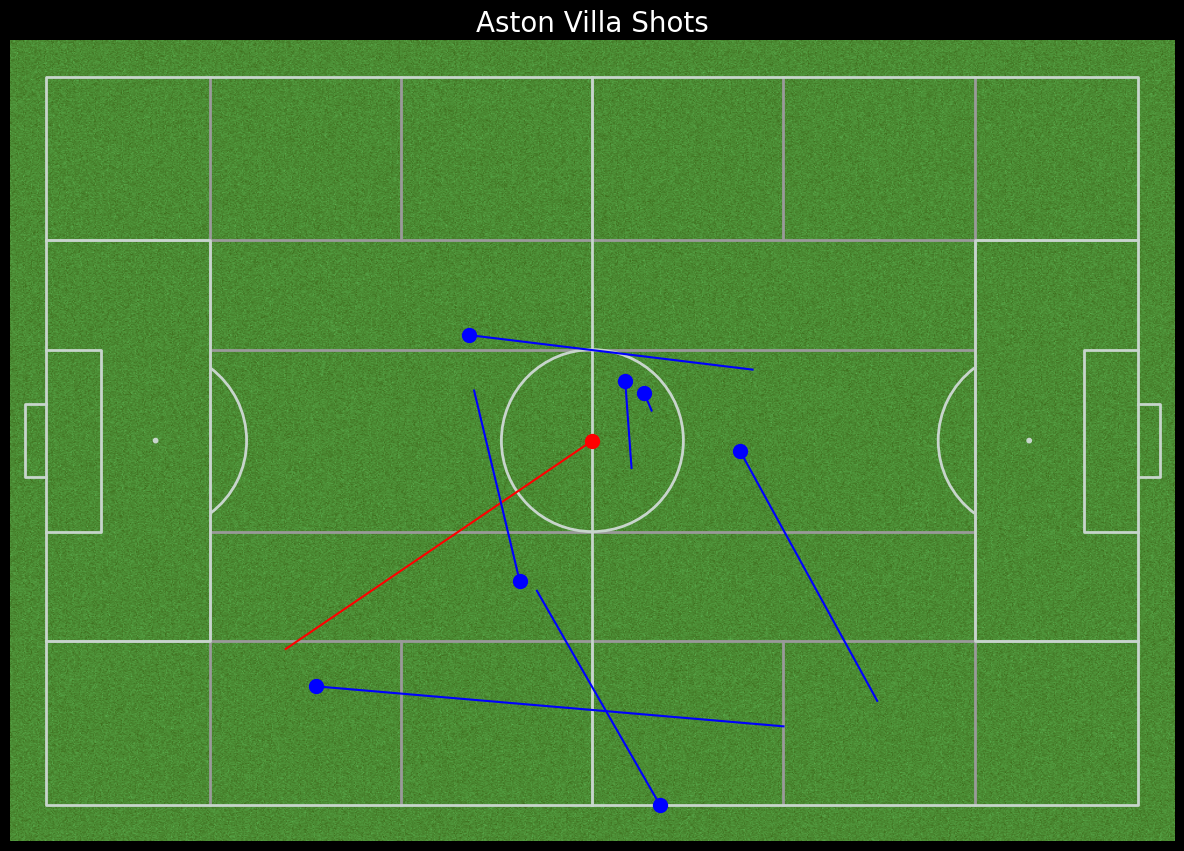

In [37]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')
pitch = Pitch(pitch_type = 'statsbomb', positional = True, positional_color = '#9A9A9A', pitch_color='grass', line_color = '#c7d5cc', goal_type='box')
pitch.draw(ax=ax)

for x in range(len(aston_villa_shots['id'])):
    if aston_villa_shots['period'].iloc[x] == 1 or aston_villa_shots['period'].iloc[x] == 2:
        size = np.sqrt(aston_villa_shots['shot.statsbomb_xg'].iloc[x]) * 200
        if aston_villa_shots['shot.outcome.name'].iloc[x] == 'Goal':
            plt.plot((aston_villa_passes['location'].iloc[x][0], aston_villa_passes['pass.end_location'].iloc[x][0]),\
                     (aston_villa_passes['location'].iloc[x][1], aston_villa_passes['pass.end_location'].iloc[x][1]), color = 'red')
                     
                     
            plt.scatter(aston_villa_passes['location'].iloc[x][0], aston_villa_passes['location'].iloc[x][1], color ='red',s= 100)
                     
        else:
                     
            plt.plot((aston_villa_passes['location'].iloc[x][0], aston_villa_passes['pass.end_location'].iloc[x][0]),\
            (aston_villa_passes['location'].iloc[x][1], aston_villa_passes['pass.end_location'].iloc[x][1]), color = 'blue')
                     
                     
            plt.scatter(aston_villa_passes['location'].iloc[x][0], aston_villa_passes['location'].iloc[x][1], color = 'blue', s= 100)
plt.title('Aston Villa Shots', color = 'white', size = 20)
                 

# Create posession chart

In [38]:
import copy
poss_test = copy.copy(df)
poss_test.head()

id  index  period     timestamp  minute  \
0  b7f68694-0261-4929-ad96-907e62ec630c      1       1  00:00:00.000       0   
1  3474ba9d-a583-4d35-87dc-d06060a70e1c      2       1  00:00:00.000       0   
2  82665823-49b6-413e-a8bf-68fcc45eab52      3       1  00:00:00.000       0   
3  dc452a79-0089-4e2e-82b6-d8349fd5718f      4       1  00:00:00.000       0   
4  5d4b6853-20d6-45f7-a931-0e4ab3e74306      5       1  00:00:00.341       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                2647   
1       0           1  0.000000       35  Starting XI                2647   
2       0           1  0.000000       18   Half Start                2647   
3       0           1  0.000000       18   Half Start                2647   
4       0           2  2.518957       30         Pass                2647   

  possession_team.name  play_pattern.id play_pattern.name  team.id  \
0          Aston Villa                1      Regular Play     2647   
1          Aston Villa                1      Regular Play      749   
2          Aston Villa                1      Regular Play      749   
3          Aston Villa                1      Regular Play     2647   
4          Aston Villa                9     From Kick Off     2647   

                 team.name  tactics.formation  \
0              Aston Villa              352.0   
1  Tottenham Hotspur Women             4231.0   
2  Tottenham Hotspur Women                NaN   
3              Aston Villa                NaN   
4              Aston Villa                NaN   

                                      tactics.lineup  \
0  [{'player': {'id': 38317, 'name': 'Lisa Weiß'}...   
1  [{'player': {'id': 36800, 'name': 'Aurora Watt...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [dc452a79-0089-4e2e-82b6-d8349fd5718f]           NaN        NaN   
3  [82665823-49b6-413e-a8bf-68fcc45eab52]           NaN        NaN   
4  [03fb4483-5b79-4680-9d43-1bd04fad0e4c]  [60.0, 40.0]    46539.0   

      player.name  position.id         position.name  pass.recipient.id  \
0             NaN          NaN                   NaN                NaN   
1             NaN          NaN                   NaN                NaN   
2             NaN          NaN                   NaN                NaN   
3             NaN          NaN                   NaN                NaN   
4  Nadine Hanssen         15.0  Left Center Midfield            46534.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4       Elisha N''Dow    40.744324    2.544741             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [26.3, 62.9]               40.0          Right Foot   

   pass.type.id pass.type.name under_pressure carry.end_location  \
0           NaN            NaN            NaN                NaN   
1           NaN            NaN            NaN                NaN   
2           NaN            NaN            NaN                NaN   
3           NaN         

In [57]:
# inverting possession duration for the opposite team 

for x in range(len(poss_test['index'])):
    if(poss_test['possession_team.id'].iloc[x]==749):
        poss_test.duration.iloc[x] = poss_test.duration.iloc[x]* (- 1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [58]:
poss_test.head()

id  index  period     timestamp  minute  \
0  b7f68694-0261-4929-ad96-907e62ec630c      1       1  00:00:00.000       0   
1  3474ba9d-a583-4d35-87dc-d06060a70e1c      2       1  00:00:00.000       0   
2  82665823-49b6-413e-a8bf-68fcc45eab52      3       1  00:00:00.000       0   
3  dc452a79-0089-4e2e-82b6-d8349fd5718f      4       1  00:00:00.000       0   
4  5d4b6853-20d6-45f7-a931-0e4ab3e74306      5       1  00:00:00.341       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1 -0.000000       35  Starting XI                2647   
1       0           1 -0.000000       35  Starting XI                2647   
2       0           1 -0.000000       18   Half Start                2647   
3       0           1 -0.000000       18   Half Start                2647   
4       0           2 -2.518957       30         Pass                2647   

  possession_team.name  play_pattern.id play_pattern.name  team.id  \
0          Aston Villa                1      Regular Play     2647   
1          Aston Villa                1      Regular Play      749   
2          Aston Villa                1      Regular Play      749   
3          Aston Villa                1      Regular Play     2647   
4          Aston Villa                9     From Kick Off     2647   

                 team.name  tactics.formation  \
0              Aston Villa              352.0   
1  Tottenham Hotspur Women             4231.0   
2  Tottenham Hotspur Women                NaN   
3              Aston Villa                NaN   
4              Aston Villa                NaN   

                                      tactics.lineup  \
0  [{'player': {'id': 38317, 'name': 'Lisa Weiß'}...   
1  [{'player': {'id': 36800, 'name': 'Aurora Watt...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [dc452a79-0089-4e2e-82b6-d8349fd5718f]           NaN        NaN   
3  [82665823-49b6-413e-a8bf-68fcc45eab52]           NaN        NaN   
4  [03fb4483-5b79-4680-9d43-1bd04fad0e4c]  [60.0, 40.0]    46539.0   

      player.name  position.id         position.name  pass.recipient.id  \
0             NaN          NaN                   NaN                NaN   
1             NaN          NaN                   NaN                NaN   
2             NaN          NaN                   NaN                NaN   
3             NaN          NaN                   NaN                NaN   
4  Nadine Hanssen         15.0  Left Center Midfield            46534.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4       Elisha N''Dow    40.744324    2.544741             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [26.3, 62.9]               40.0          Right Foot   

   pass.type.id pass.type.name under_pressure carry.end_location  \
0           NaN            NaN            NaN                NaN   
1           NaN            NaN            NaN                NaN   
2           NaN            NaN            NaN                NaN   
3           NaN         

# Creating chart

([<matplotlib.axis.XTick at 0x2814f55d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

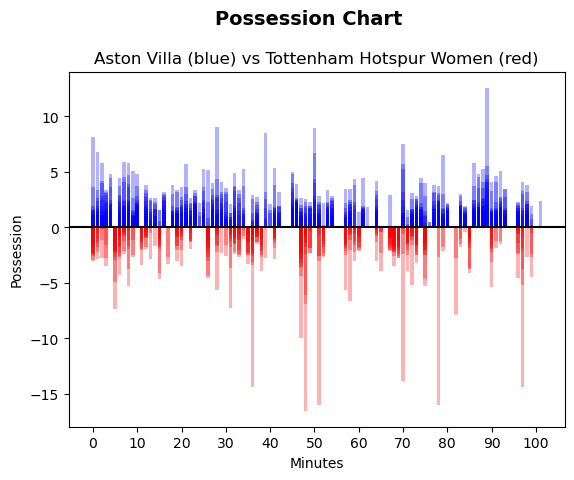

In [60]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top = 0.85)

#set titles 
fig.suptitle('Possession Chart', fontsize = 14, fontweight = 'bold')
ax.set_title(df['team.name'][0]+' (blue)' + ' vs ' + df['team.name'][1] + ' (red)')
ax.set_xlabel('Minutes')
ax.set_ylabel('Possession')


plt.bar(poss_test.minute, poss_test.duration, color = np.where(poss_test.duration > 0, 'b', 'r'), alpha = 0.3)


plt.axhline(0, color = 'black')
tot_min = poss_test.minute.max()
plt.xticks(np.arange(0, tot_min, step =10))